In [ ]:
from dataset import (
    BuildingDataset,
    show_segmentation,
    data_loaders,
    show_segmentation_v2,
    MiyazakiDataset,
    get_transform,
)
from model import ModelConfig, new_model, TwoMLPRegression
from dataset import NUMBER_OF_CLASSES
import dataset
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torch
import logging

logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [ ]:
miyazaki_dataset = MiyazakiDataset(
    "datasets/miyazaki/jpn", transforms=get_transform(True)
)
# miyazaki_data = [d for d in miyazaki_dataset]
miyazaki_data = [miyazaki_dataset[i] for i in range(3)]

for sample in miyazaki_data[:10]:
    img, pred_masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["labels"]]
    show_segmentation(img, pred_masks, boxes, height_labels)

In [ ]:
# Load data for exploration.
dataset_expl = BuildingDataset(
    "datasets/mlc_training_data/images_annotated/",
)

# data = [d for d in dataset_expl]
data = [dataset_expl[i] for i in range(3)]

for sample in data[:10]:
    img, pred_masks, boxes = sample[0], sample[1]["masks"], sample[1]["boxes"]
    height_labels = [str(h.item()) for h in sample[1]["building_heights"]]
    show_segmentation(img, pred_masks, boxes, height_labels)


def show_distribution(values, bins=None):
    print("Min: ", pred_masks.min(), "Max: ", pred_masks.max())
    for q in [0.25, 0.5, 0.75, 0.95, 0.99]:
        print(f"Quantile {q}: {np.quantile(values, q)}")

    counts, bins = np.histogram(
        values,
        bins=bins,
    )
    plt.stairs(counts, bins, fill=True)
    plt.show()


heights = [d[1]["building_heights"] for d in data]
heights = np.hstack(heights)
show_distribution(heights, [3, 6, 9, 15, 25, 40, 70, 120, 200, max(250, heights.max())])

aaaeexkyyo.json
aaaeexkyyo.png
aabijjmwby.json
aabijjmwby.png
aaphblzmkh.json
aaphblzmkh.png
aaytztwkwz.json
aaytztwkwz.png
abavedhect.json
abavedhect.png
ls: stdout: Undefined error: 0


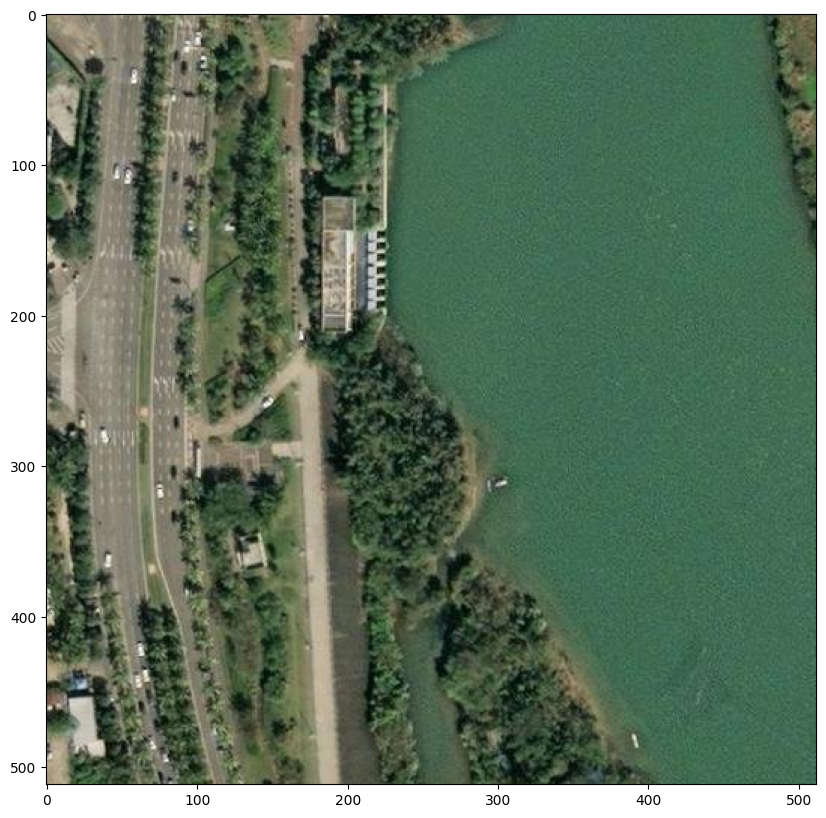

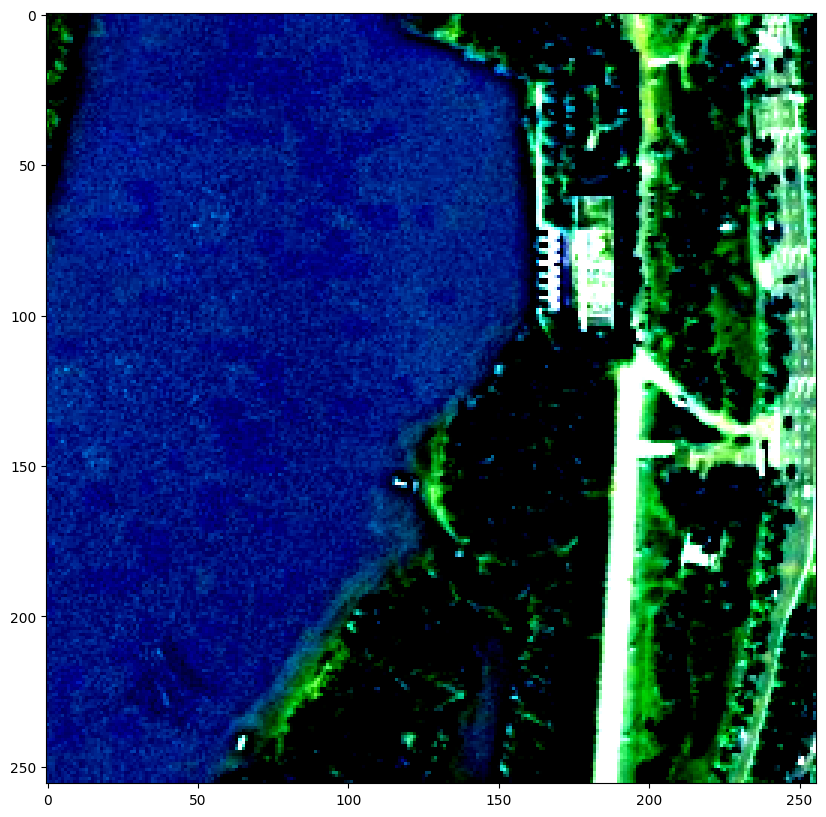

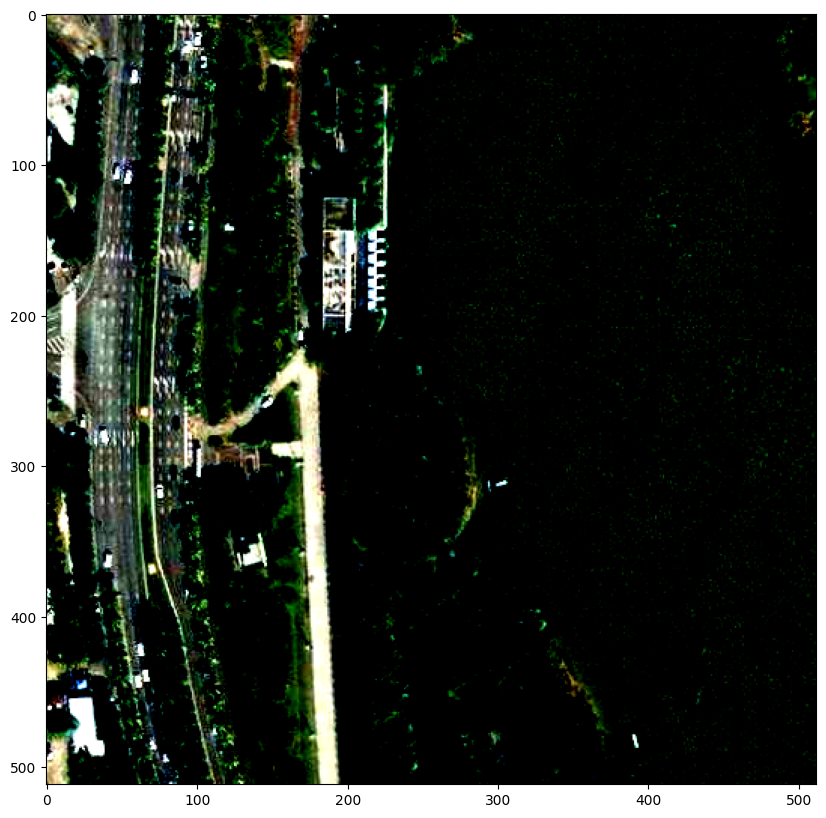

In [101]:
from torchvision.transforms import v2 as T
from torchvision.io import read_image

from dataset import get_transform


def get_transform_v2(train: bool) -> T.Compose:
    transforms = []

    transforms.append(T.ToDtype(torch.float, scale=True))

    if train:
        # Horizontal flip
        transforms.append(T.RandomHorizontalFlip(0.5))

        # Vertical flip
        transforms.append(T.RandomVerticalFlip(0.5))

        # Random rotation
        transforms.append(T.RandomRotation(degrees=15))

        # Random crop and resize
        transforms.append(T.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)))

        # Color jitter
        transforms.append(
            T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)
        )

        # Random grayscale
        transforms.append(T.RandomGrayscale(p=0.2))

        # Gaussian noise
        transforms.append(T.Lambda(lambda img: img + torch.randn_like(img) * 0.1))

    # Normalize
    transforms.append(
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    )

    transforms.append(T.ToPureTensor())

    return T.Compose(transforms)


# Example usage
train_transforms = get_transform_v2(train=True)
test_transforms = get_transform_v2(train=False)

! ls datasets/images_annotated/ | head
img = read_image("datasets/images_annotated/aabijjmwby.png").squeeze(0)

plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))

img_train = train_transforms(img)
plt.figure(figsize=(10, 10))
plt.imshow(img_train.permute(1, 2, 0))

img_test = test_transforms(img)
plt.figure(figsize=(10, 10))
plt.imshow(img_test.permute(1, 2, 0))